<a href="https://colab.research.google.com/github/Maralmaa1/DIV-tasks/blob/main/Credit_information_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""
1.What kind of company is Home Credit?
Home Credit is an international non-bank financial institution. 
Home Credit using various statistical and machine learning methods.

2.What is expected in this competition?
While Home Credit is currently using various statistical and machine learning methods to make these predictions

3.What are the company's benefits from predicting it?
Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, 
maturity, and repayment calendar that will empower their clients to be successful. 
"""


"\n1.What kind of company is Home Credit?\nHome Credit is an international non-bank financial institution. \nHome Credit using various statistical and machine learning methods.\n\n2.What is expected in this competition?\nWhile Home Credit is currently using various statistical and machine learning methods to make these predictions\n\n3.What are the company's benefits from predicting it?\nDoing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, \nmaturity, and repayment calendar that will empower their clients to be successful. \n"

[Problem 2] Understanding the overview of the data
To get an overview of your data, do the following:

- Use .head() , .info() , describe() , etc.​ ​
- Check for missing values
- Draw a graph showing the percentage of classes

Please provide an explanation and discussion for each result.

In [3]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris

app_train = pd.read_csv('application_train.csv')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131974 entries, 0 to 131973
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 122.8+ MB


In [5]:
app_train.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
131969      253057       0         Cash loans           M            Y   
131970      253058       0         Cash loans           F            Y   
131971      253059       0         Cash loans           F            N   
131972      253060       0         Cash loans           M            Y   
131973      253061       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

In [16]:
#detect missing values

#Count missing values in each row and column

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_info = missing_data(app_train)
print(missing_info)

                          Total    Percent
COMMONAREA_MEDI           92182  69.848607
COMMONAREA_AVG            92182  69.848607
COMMONAREA_MODE           92182  69.848607
NONLIVINGAPARTMENTS_MODE  91566  69.381848
NONLIVINGAPARTMENTS_AVG   91566  69.381848
...                         ...        ...
NAME_INCOME_TYPE              0   0.000000
NAME_EDUCATION_TYPE           0   0.000000
NAME_FAMILY_STATUS            0   0.000000
TARGET                        0   0.000000
SK_ID_CURR                    0   0.000000

[122 rows x 2 columns]


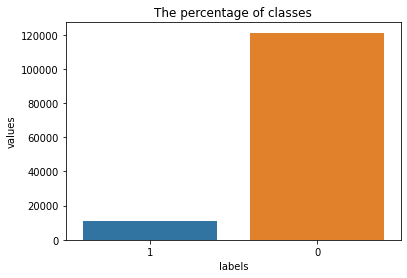

From the barplot of target, this dataset is unbalanced dataset


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

temp = app_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

plt.title('The percentage of classes')
sns.barplot(x = 'labels', y="values", data=df, order = [1,0])
plt.show()

print('From the barplot of target, this dataset is unbalanced dataset')

[Problem 3] Defining issues

Please set multiple issues / questions of your own based on the overview of the data.

In [11]:
"""
1. Dataset is unbalanced
2. There is lot of missing values. Almost half of feature has missing values about 50 percent
3. Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant. The applicants with the type of income Maternity leave have almost (40%) ratio of not returning loans, followed by Unemployed (37%).
4. Most of applicants for loans are income from Working, and the type of income Maternity leave and Unemployed have almost (77%) ratio of not returning loans
"""

'\n1. there is lot of missing values. Almost half of feature has missing values about 50 percent\n2. Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant. The applicants with the type of income Maternity leave have almost (40%) ratio of not returning loans, followed by Unemployed (37%).\n3. Most of applicants for loans are income from Working, and the type of income Maternity leave and Unemployed have almost (77%) ratio of not returning loans\n'

[Problem 4] Data exploration

We will proceed with the data search to solve assignment and questions set in Problem 3. Create at least 5 tables and graphs to use in your search, along with your thoughts.

If you have any new questions during the exploration process, please add them to the answer to Problem 3.

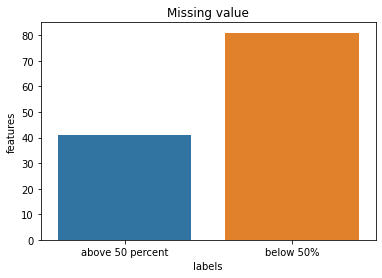

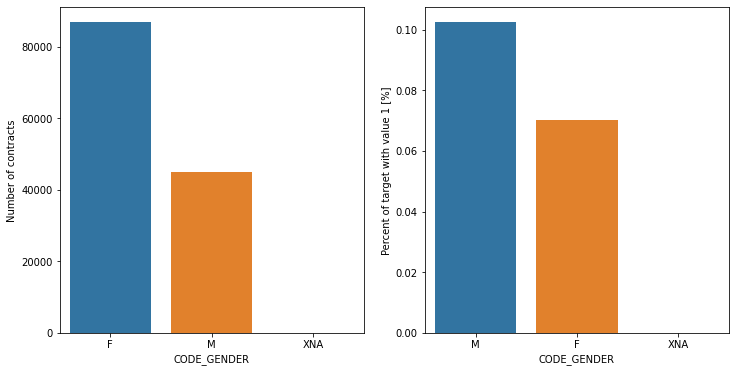

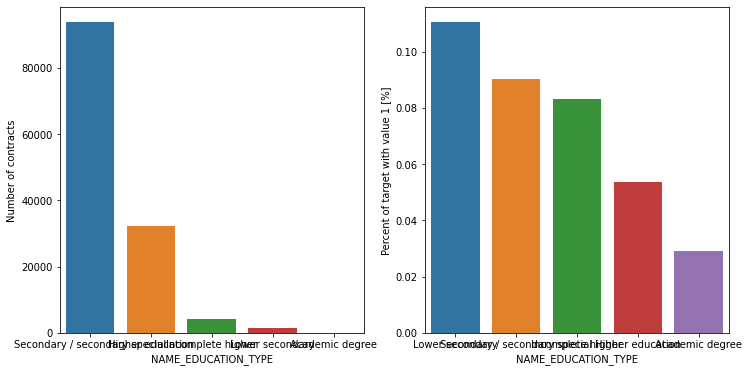

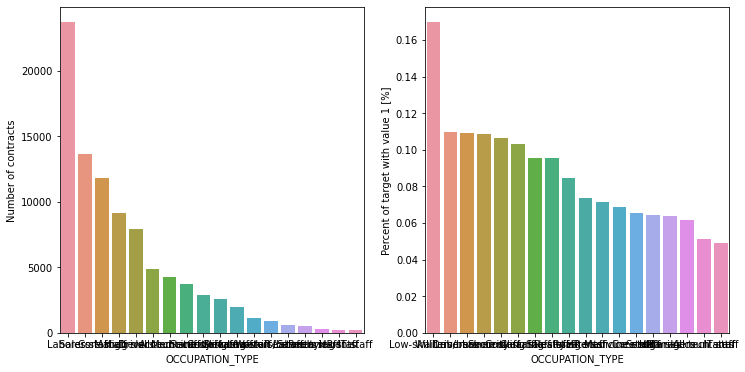

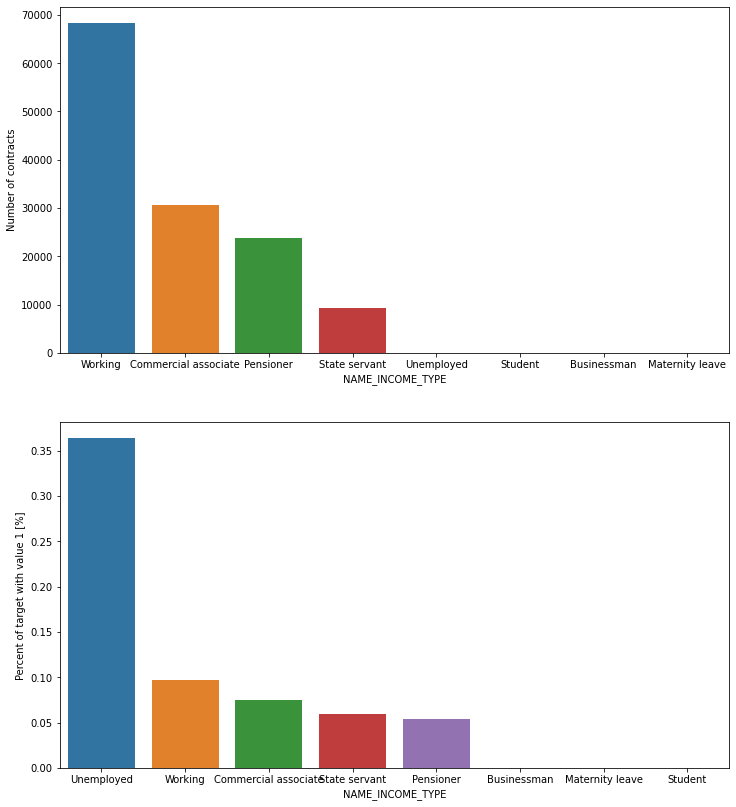

<ipython-input-19-12edb8808851>:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(app_train[feature].dropna(),color=color, kde=True,bins=100)


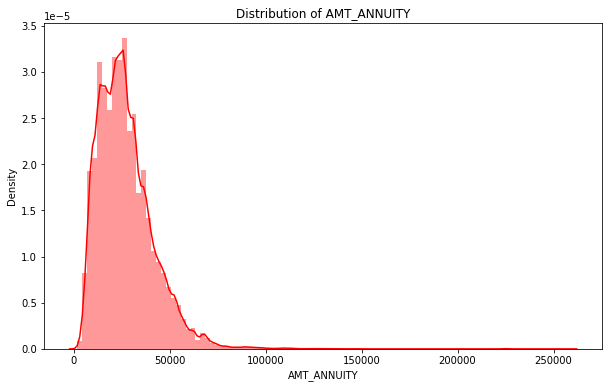

In [19]:
# 1. Unbalanced by target
# 2. too many missing values

j = 0

def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

for i in range (len(missing_info)):
    if missing_info.iloc[i,1] > 50:
        j = j + 1

def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(app_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()  


df = pd.DataFrame({'labels': ['above 50 percent', 'below 50%'],
                   'features': [j, len(missing_info)-j]
                  })
plt.title('Missing value')
sns.barplot(x = 'labels', y="features", data=df)
plt.show()

# 3. some stats
plot_stats('CODE_GENDER')
plot_stats('NAME_EDUCATION_TYPE')
plot_stats('OCCUPATION_TYPE')
plot_stats('NAME_INCOME_TYPE',False,False)
plot_distribution('AMT_ANNUITY', 'red')